In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('globalterrorismdb_0522dist.csv')

df.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 135 entries, eventid to related
dtypes: float64(54), int64(23), object(58)
memory usage: 216.0+ MB


In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [9]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,2.097060e+05,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,209706.000000,205015.000000,205014.000000,209705.000000,...,1.533000e+03,7.340000e+02,9.510000e+02,725.000000,14091.000000,13494.000000,209706.000000,209706.000000,209706.000000,209706.000000
mean,2.004867e+11,2004.800993,6.455285,15.527930,0.051525,130.291351,7.279854,23.358696,30.416738,1.468387,...,2.791526e+06,3.211036e+05,6.204108e+05,182.750345,4.705912,-31.945531,-4.424289,-4.339318,0.086841,-3.850758
std,1.351933e+09,13.519321,3.387098,8.801104,0.221066,111.714562,2.905697,18.137061,56.113029,0.984958,...,2.826923e+07,5.005760e+06,9.195574e+06,2567.718184,2.030311,64.494306,4.543800,4.640302,0.536943,4.677966
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-100.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.992080e+11,1992.000000,4.000000,8.000000,0.000000,69.000000,6.000000,11.510046,8.748117,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.012010e+11,2012.000000,6.000000,15.000000,0.000000,98.000000,8.000000,31.300213,43.746215,1.000000,...,1.000000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.015123e+11,2015.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.557022,68.835918,1.000000,...,3.420000e+05,0.000000e+00,6.640600e+02,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.020123e+11,2020.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2958.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [13]:
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]

In [15]:
df.head()

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [17]:
df.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
state               0
city              427
latitude         4691
longitude        4692
AttackType          0
Killed          12527
Wounded         19936
Target            637
Summary         66120
Group               0
Target_type         0
Weapon_type         0
Motive         154648
success             0
dtype: int64

In [19]:
df1= df.dropna(axis=0)

In [21]:
df.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [23]:
year_attacks = df.groupby('Year').size().reset_index(name='count')

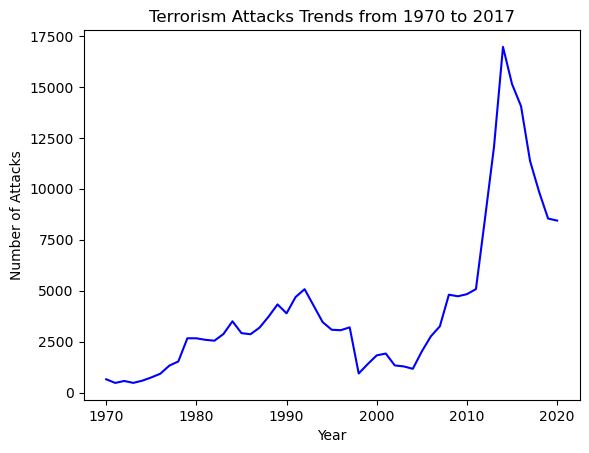

In [25]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

In [27]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')

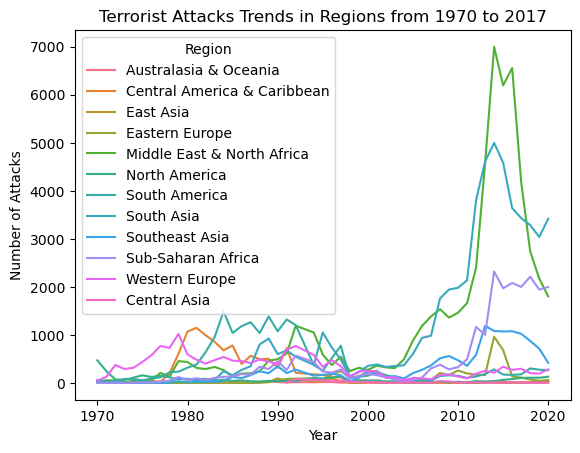

In [29]:
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

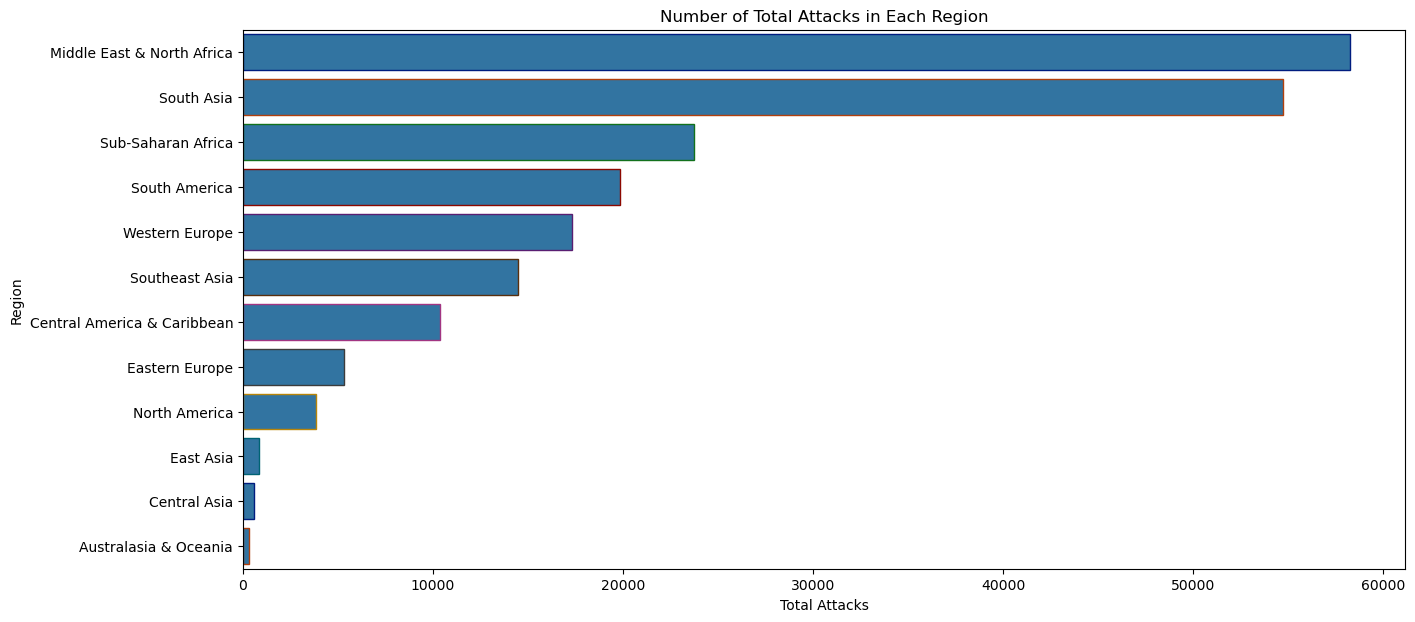

In [33]:
region_attacks= df.Region.value_counts().to_frame().reset_index()
region_attacks.columns = ['Region', 'Total Attacks']
plt.subplots(figsize=(15,7))
sns.barplot(x=region_attacks['Total Attacks'], y=region_attacks.Region, edgecolor=sns.color_palette('dark',10),orient='h')
plt.title('Number of Total Attacks in Each Region')
plt.show()

In [37]:
region_attack_counts = df.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']
region = df.Region.unique()

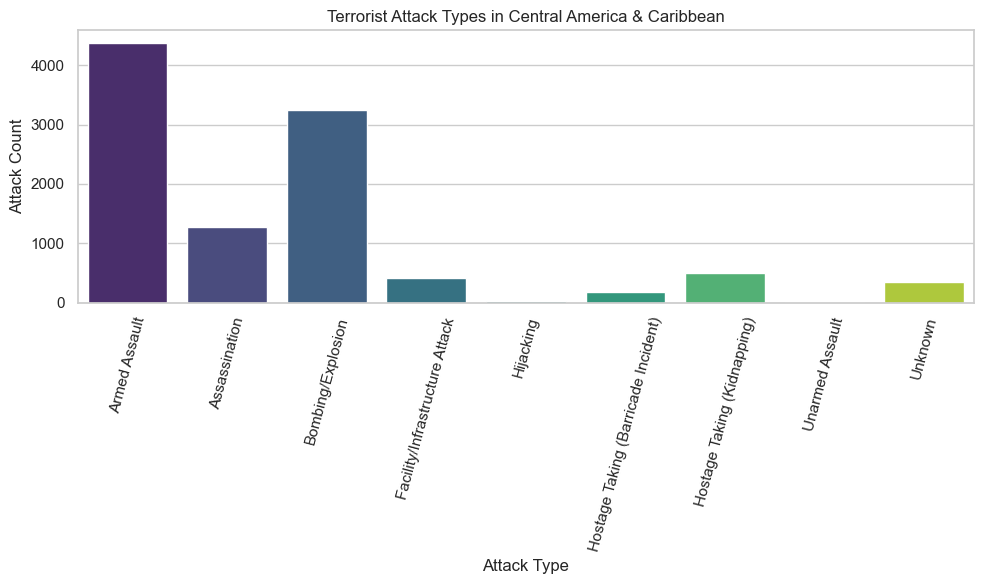

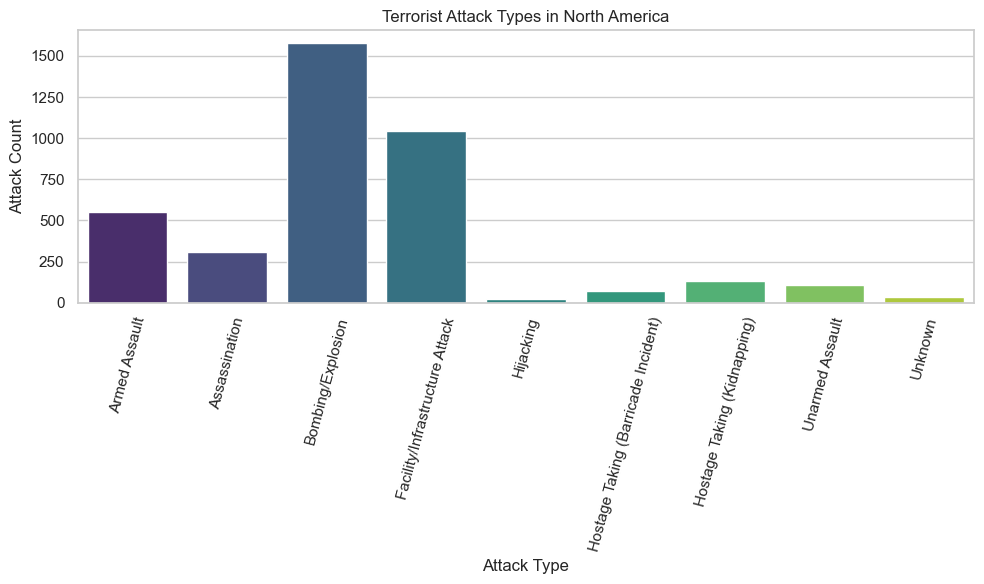

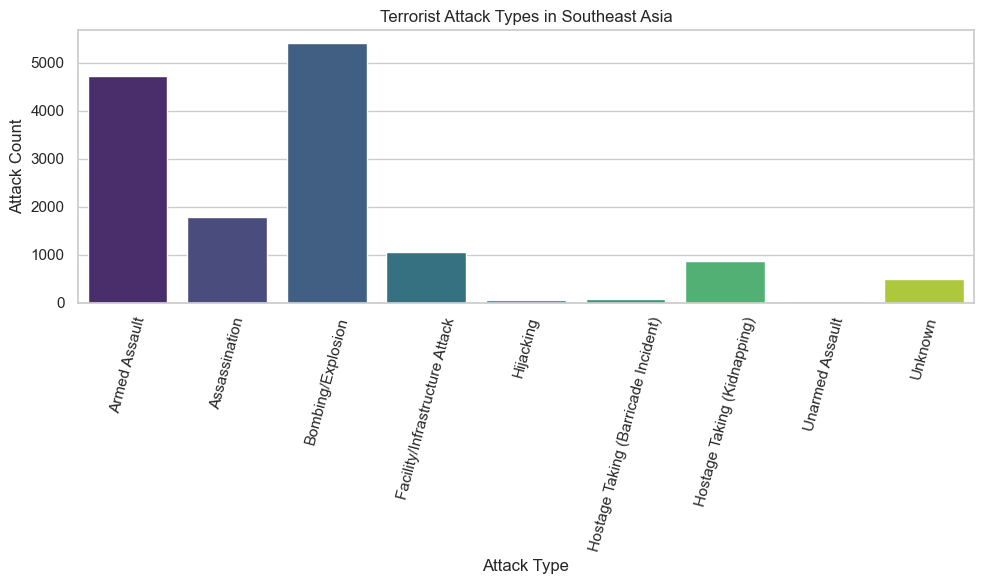

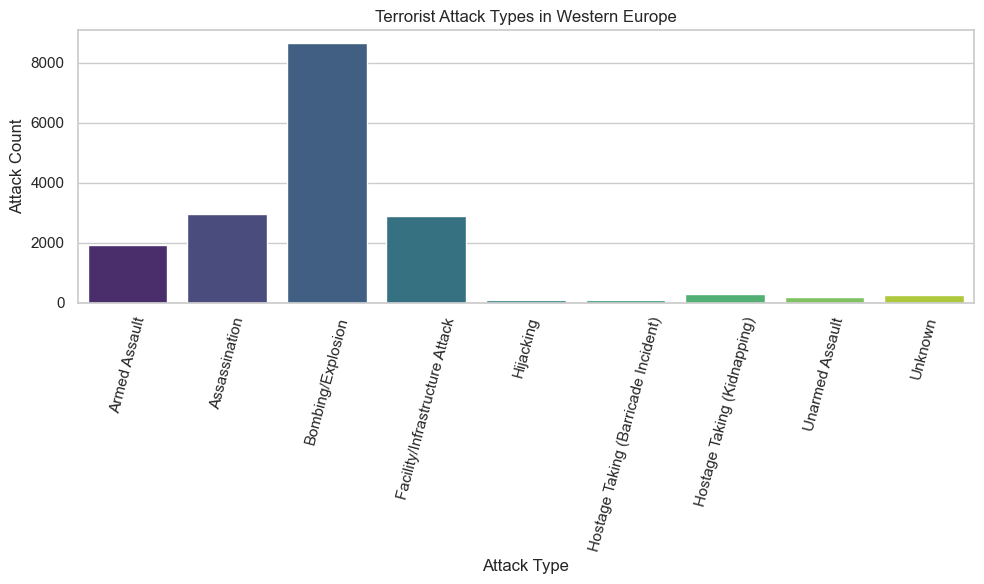

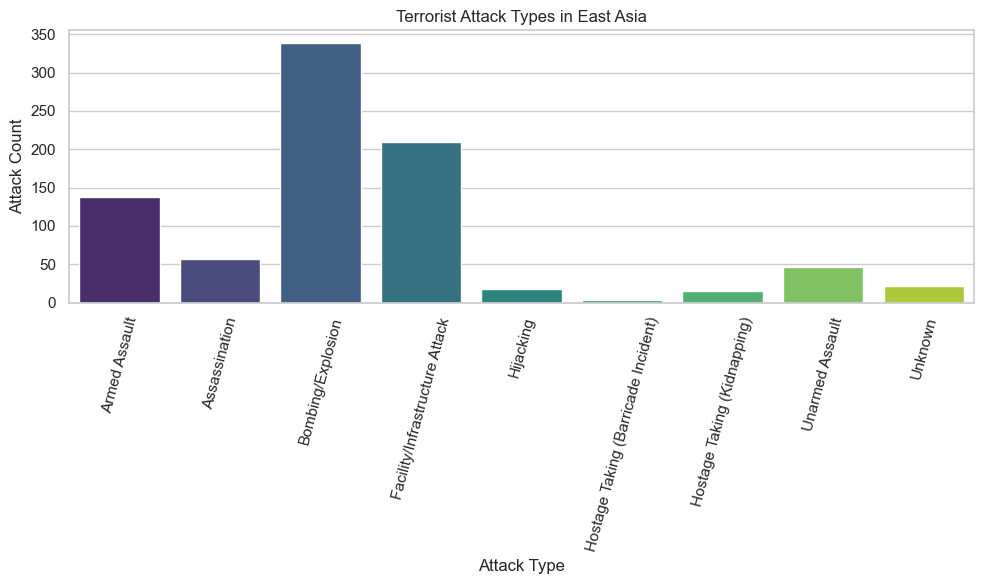

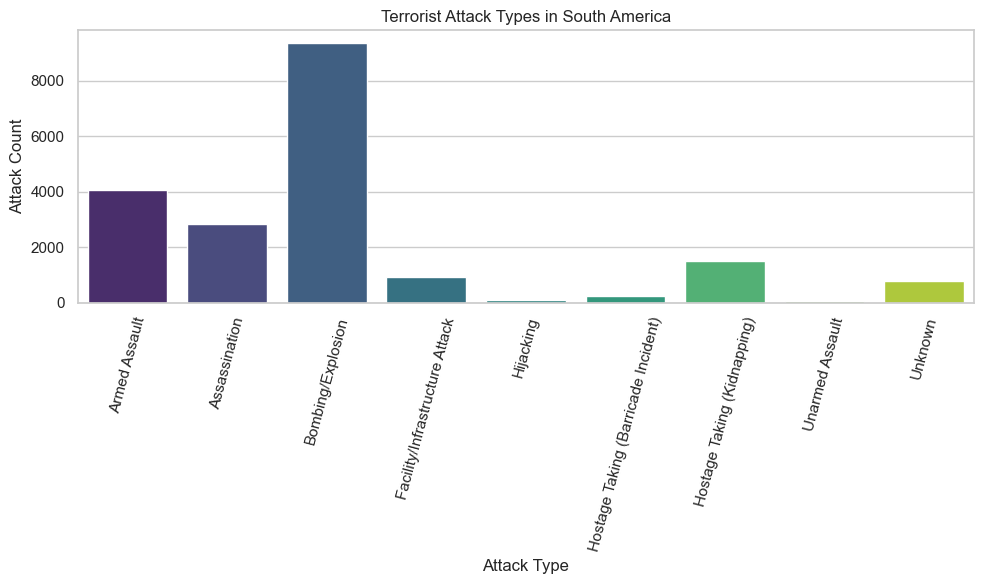

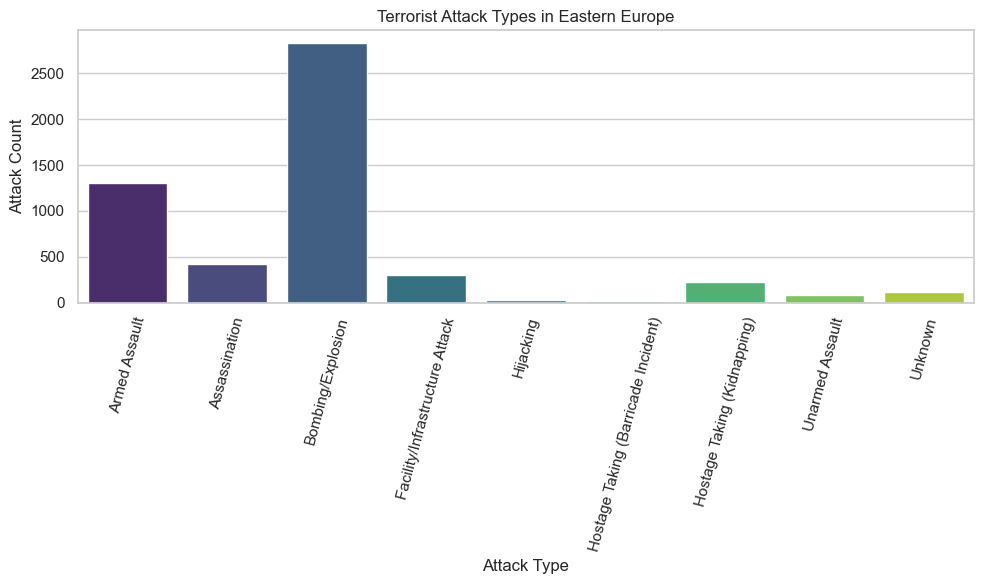

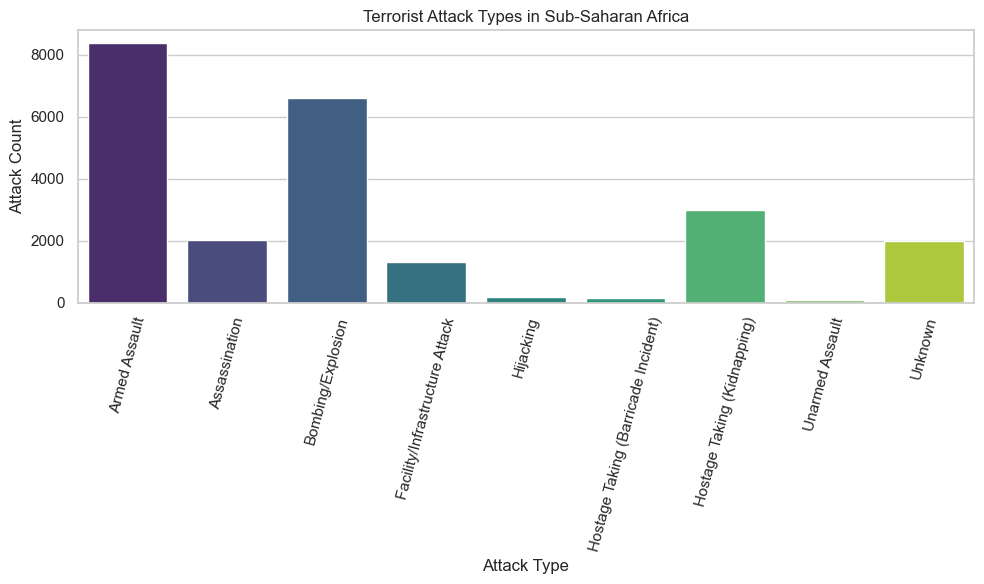

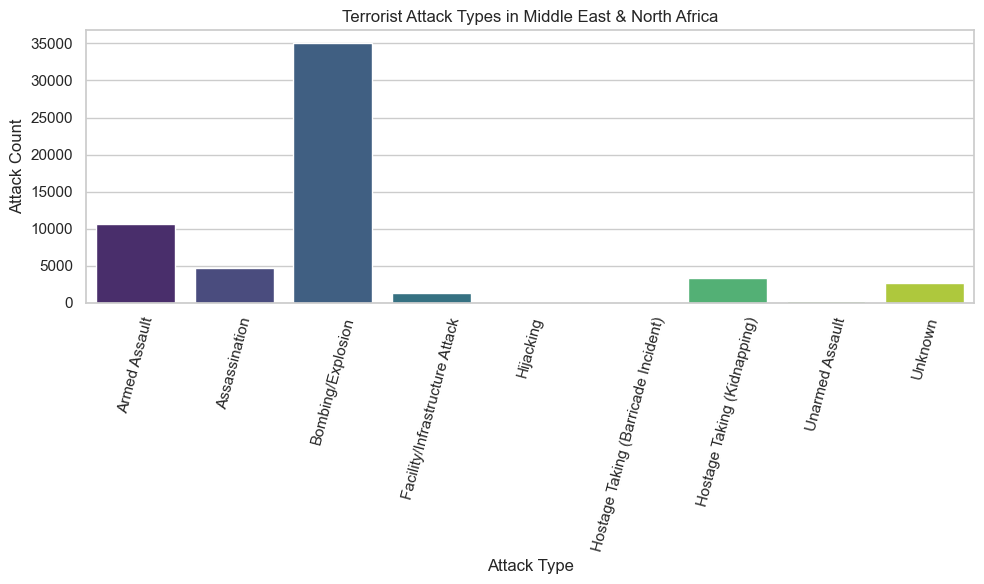

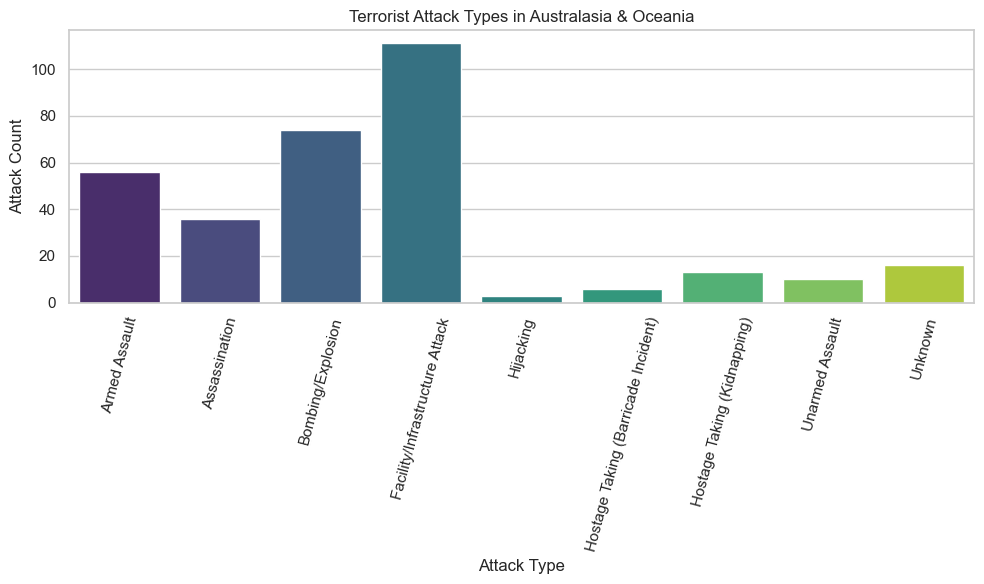

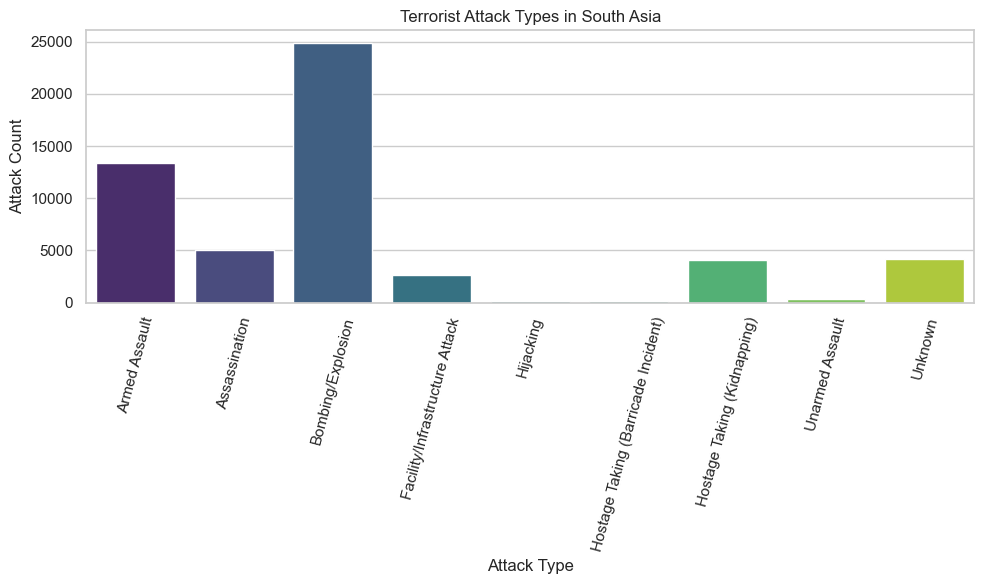

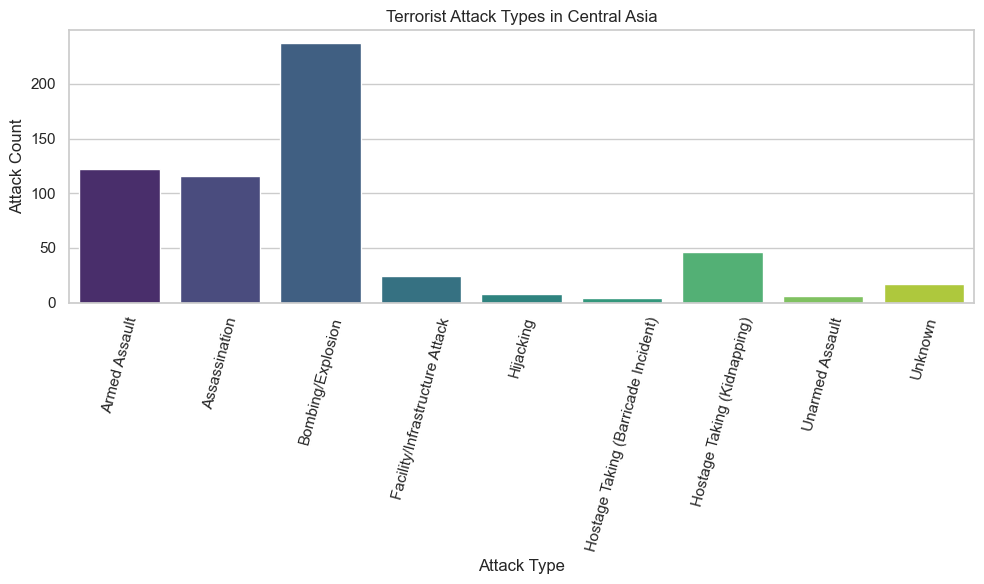

In [39]:
# Attack type specific to region wise

def region_attack_type(region):
    sns.set(style="whitegrid")
    
    for i in region:
        selected_region = i

        # Filter the data for the selected region
        selected_region_data = region_attack_counts[region_attack_counts['Region'] == selected_region]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=selected_region_data, x='AttackType', y='Attack Count', palette="viridis")
        plt.title(f'Terrorist Attack Types in {selected_region}')
        plt.xlabel('Attack Type')
        plt.ylabel
        ('Number of Attacks')
        plt.xticks(rotation=75)
        plt.tight_layout()

        plt.show()

region_attack_type(region)


In [41]:
groups = df[['AttackType','Group','Weapon_type','Target_type']]

In [43]:
groups

,AttackType,Group,Weapon_type,Target_type
0,Assassination,MANO-D,Unknown,Private Citizens & Property
1,Hostage Taking (Kidnapping),23rd of September Communist League,Unknown,Government (Diplomatic)
2,Assassination,Unknown,Unknown,Journalists & Media
3,Bombing/Explosion,Unknown,Explosives,Government (Diplomatic)
4,Facility/Infrastructure Attack,Unknown,Incendiary,Government (Diplomatic)
...,...,...,...,...
209701,Bombing/Explosion,Houthi extremists (Ansar Allah),Explosives,Private Citizens & Property
209702,Bombing/Explosion,Houthi extremists (Ansar Allah),Explosives,Private Citizens & Property
209703,Facility/Infrastructure Attack,Left-wing extremists,Incendiary,Military
209704,Armed Assault,Unknown,Firearms,Private Citizens & Property


In [45]:
group_counts = groups['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)

# Select the top 5 most frequent groups
sort = sort.iloc[1:]
top_5 = sort.head(5)

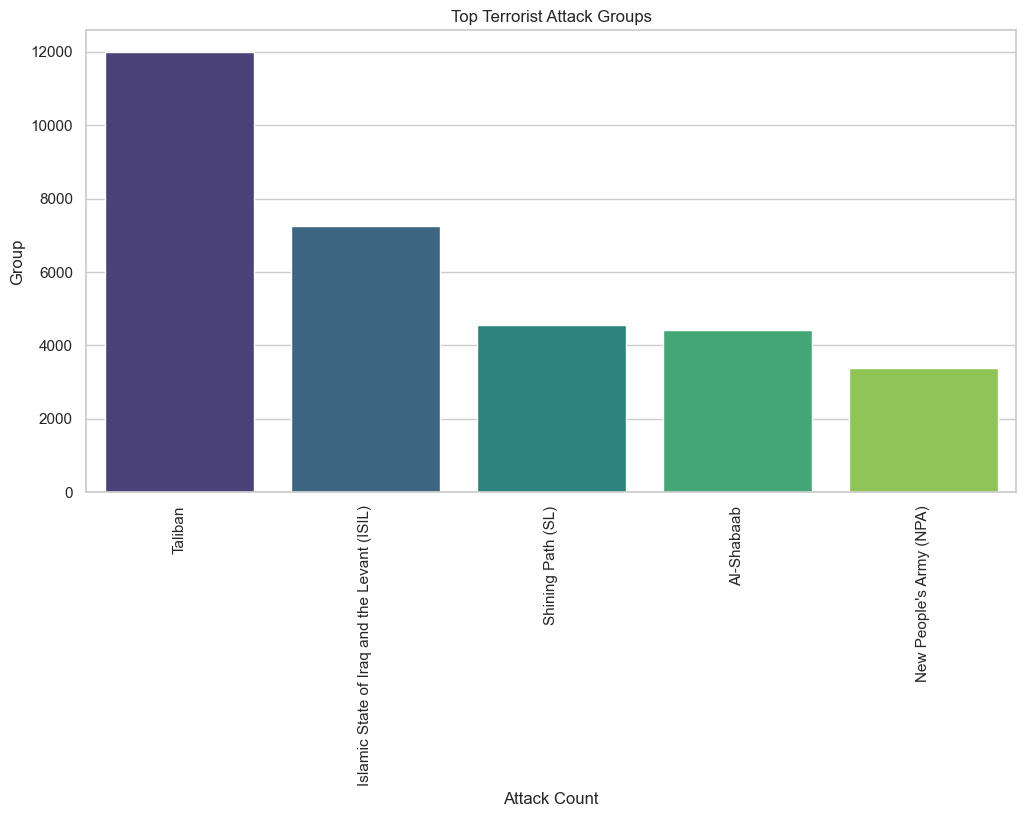

In [47]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5.index, y=top_5.values, palette="viridis")
plt.title('Top Terrorist Attack Groups')
plt.xlabel('Attack Count')
plt.ylabel('Group')
plt.xticks(rotation = 90)
plt.show()

In [49]:
corr_data = df.groupby('Country').agg({'Country': 'count', 'Killed': 'sum', 'Wounded': 'sum'})
corr_data.columns = ['Total Attacks', 'Total Killed', 'Total Wounded']
corr_data.reset_index(inplace=True)
corr_data['Casualties'] = corr_data['Total Killed']+corr_data['Total Wounded']
corr_data.drop(['Total Killed', 'Total Wounded'],axis = 1,inplace = True)

In [51]:
corr_data

,Country,Total Attacks,Casualties
0,Afghanistan,18920,134791.0
1,Albania,82,168.0
2,Algeria,2753,20258.0
3,Andorra,1,0.0
4,Angola,501,5516.0
...,...,...,...
199,Yemen,6027,26303.0
200,Yugoslavia,203,400.0
201,Zaire,50,535.0
202,Zambia,62,132.0


In [53]:
noa = df.groupby('Year').size().reset_index(name='count')
noa

,Year,count
0,1970,651
1,1971,471
2,1972,567
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [57]:
sum_of_attacks = noa['count'].sum()
print('Total number of attacks all over the world:', sum_of_attacks)

Total number of attacks all over the world: 209706


In [59]:
succ = df.groupby(['success']).size().reset_index(name='count')
succ['percentage'] =  succ['count']/sum_of_attacks *100
succ

,success,count,percentage
0,0,24404,11.637245
1,1,185302,88.362755


Text(0.5, 0, 'Outcome')

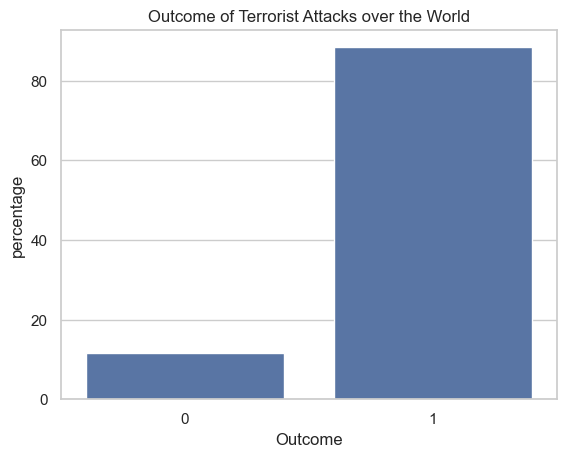

In [61]:
sns.barplot(x = 'success', y = 'percentage', data=succ)
plt.title("Outcome of Terrorist Attacks over the World")
plt.xlabel("Outcome")

## terrorism analysis on pakistan

In [63]:
pakistan = df[(df['Country'] == 'Pakistan')]
pakistan.head(5)

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
585,197011010001,1970,11,1,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,Assassination,4.0,20.0,Deputy Foreign Minister: Zygfryd Wolniak,NaN,Unknown,Government (Diplomatic),Vehicle (not to include vehicle-borne explosiv...,NaN,1
2216,197402020001,1974,2,2,Pakistan,South Asia,Sindh,Karachi,24.891115,67.143311,Bombing/Explosion,0.0,0.0,Greek Freighter in Karachi,NaN,Muslim Guerrillas,Maritime,Firearms,NaN,1
2704,197412090001,1974,12,9,Pakistan,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,Bombing/Explosion,0.0,2.0,USIS Center,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
2743,197500000001,1975,0,0,Pakistan,South Asia,Punjab,Rawalpindi,33.594013,73.069077,Bombing/Explosion,NaN,NaN,Pakistan Airlines Boeing 707,NaN,Unknown,Airports & Aircraft,Explosives,NaN,1
2794,197502080001,1975,2,8,Pakistan,South Asia,North-West Frontier Province,Peshawar,34.006004,71.537430,Assassination,1.0,0.0,"Hayat Mohammed Khan Sherpao, home minister",NaN,National Awami Party,Government (General),Firearms,NaN,1


In [65]:
#how many number of attacks where there in India
pakistan_attacks = pakistan['eventid'].count()
print('There were',pakistan_attacks ,'attacks in Pakistan.')

There were 15504 attacks in Pakistan.


In [67]:
pakistan_success = pakistan.groupby('success').size().reset_index(name='count')
pakistan_success['percentage'] = pakistan_success['count'] / pakistan_attacks * 100
pakistan_success

,success,count,percentage
0,0,1954,12.603199
1,1,13550,87.396801


Text(0.5, 0, 'Outcome')

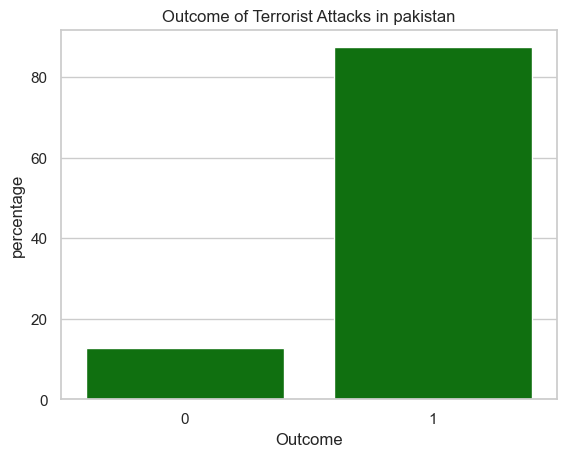

In [69]:
sns.barplot(x='success', y='percentage', data = pakistan_success, color='green')
plt.title("Outcome of Terrorist Attacks in pakistan")
plt.xlabel("Outcome")

In [71]:
attack_types_pakistan = pakistan.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_pakistan

,AttackType,success,count
0,Armed Assault,0,199
1,Armed Assault,1,4002
2,Assassination,0,450
3,Assassination,1,1096
4,Bombing/Explosion,0,1248
5,Bombing/Explosion,1,6938
6,Facility/Infrastructure Attack,0,6
7,Facility/Infrastructure Attack,1,313
8,Hijacking,0,2
9,Hijacking,1,17


Text(0.5, 1.0, 'Facility ')

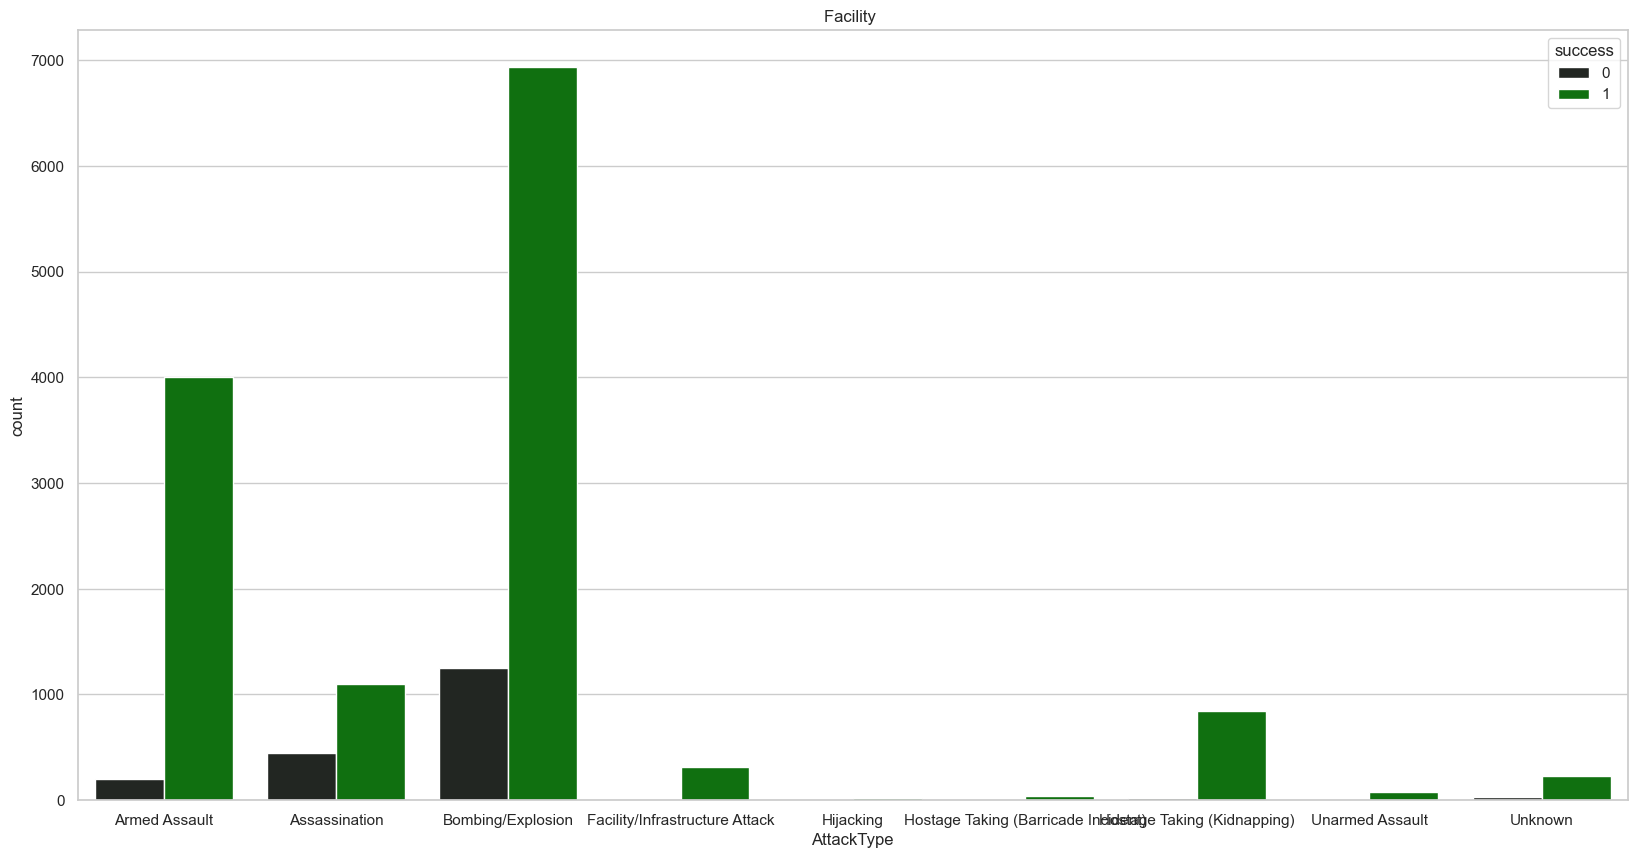

In [73]:
plt.figure(figsize=(20,10))
sns.barplot(x='AttackType', y='count', hue='success', data=attack_types_pakistan, color = "green")
plt.title("Facility ")

In [75]:
#number of kills
nkills_pakistan = pakistan.groupby('AttackType')[['Killed']].sum().reset_index()
nkills_pakistan

,AttackType,Killed
0,Armed Assault,8267.0
1,Assassination,2059.0
2,Bombing/Explosion,13029.0
3,Facility/Infrastructure Attack,59.0
4,Hijacking,49.0
5,Hostage Taking (Barricade Incident),404.0
6,Hostage Taking (Kidnapping),767.0
7,Unarmed Assault,9.0
8,Unknown,616.0


<Axes: xlabel='AttackType', ylabel='Killed'>

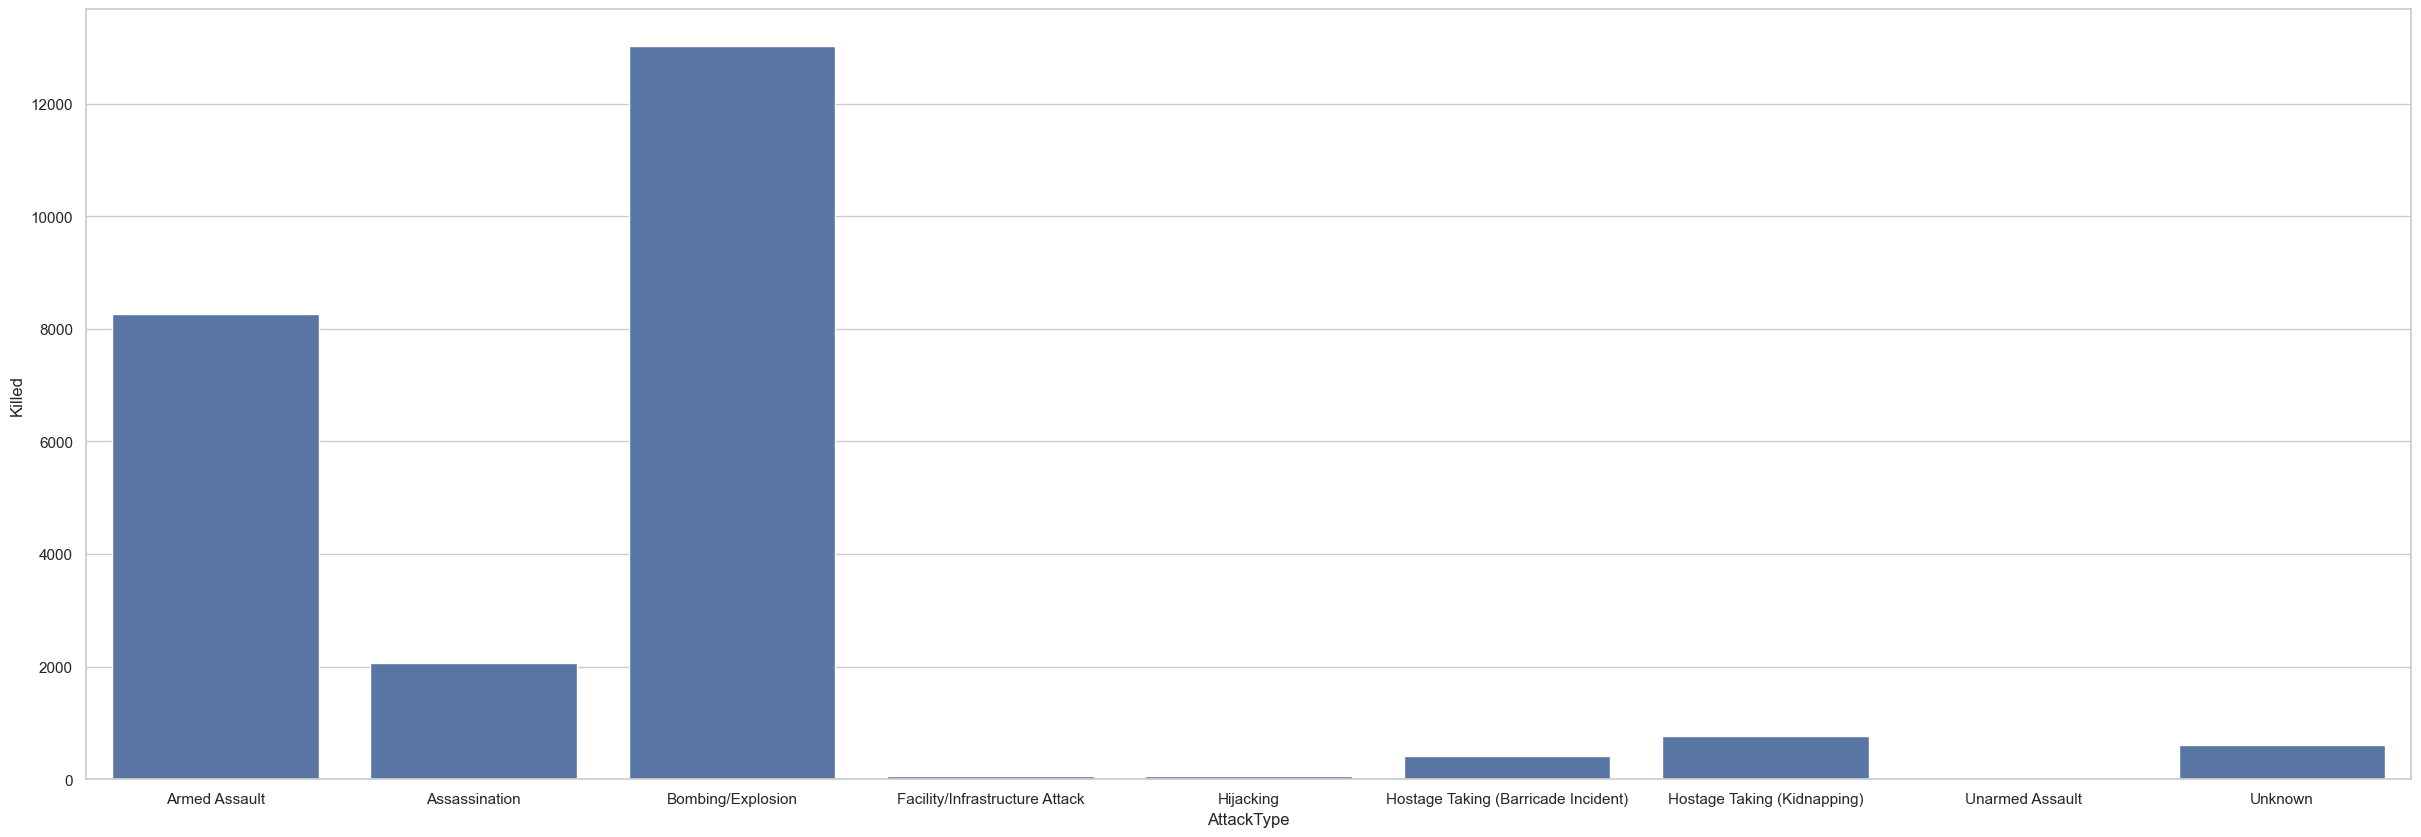

In [77]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=nkills_pakistan)